In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm
# from apexmf import apexmf_pst_viz


In [2]:
sys.path.insert(0, 'D:/spark-brc_gits/apexmf_git/apexmf')
import apexmf_pst_viz, apexmf_pst_utils
from salt.salt_handler import SaltAnalysis, SaltViz, get_stats

In [48]:
from pandas.tseries.offsets import MonthEnd

In [49]:
wd = "d:/Projects/Watersheds/Animas/Analysis/AMRSs"
os.chdir(wd)

In [76]:
df = pd.read_csv('salt_012_monthly.obd.txt', parse_dates=True, index_col=0, sep='\t')
df['Date'] = pd.to_datetime(df.index, format="%Y%m") + MonthEnd(0)
df.columns = [i.lower() for i in df.columns]
df.set_index('date', inplace=True)
df.columns = filter_salt_colnams(df.columns)
df.to_csv('salt_012_mon.obd', sep='\t')

In [77]:
df

,load_so4,load_na,load_k,load_mg,load_cl,load_ca,load_hco3
date,,,,,,,
1992-03-31,41297,574.40,170.45,870,208.63,15801,956.0
1992-04-30,50955,1039.00,309.60,1500,480.05,28317,5140.0
1992-05-31,81556,2293.00,832.95,3286,897.00,57629,34184.0
1992-06-30,86072,2400.00,920.00,3553,701.38,58445,47540.0
1992-07-31,53697,1143.00,367.51,1769,288.61,29733,13298.0
...,...,...,...,...,...,...,...
2010-11-30,53191,729.80,189.29,1197,302.92,19625,744.0
2011-04-30,66048,978.00,256.67,1457,608.00,22446,1310.0
2011-06-30,180049,4606.00,1962.00,6985,1558.00,86798,43989.0


In [66]:
new = [i.split('_')[0] for i in df.columns]
new

['so4', 'na', 'k', 'mg', 'cl', 'co3', 'ca', 'hco3']

In [67]:
new = [i.split('_')[1] for i in df.columns]
new

['load', 'load', 'load', 'load', 'load', 'load', 'load', 'load']

In [69]:
def filter_salt_colnams(df_colnams):
    prefix= [i.split('_')[0] for i in df_colnams]
    if prefix[0] != 'load':
        new_pre = [i.split('_')[1] for i in df_colnams]
        new_suf = [i.split('_')[0] for i in df_colnams]
        new_colnams = [f'{np}_{ns}' for np, ns in zip(new_pre, new_suf)]
    
        return new_colnams

In [70]:
newc = filter_salt_colnams(df.columns)

In [71]:
newc

['load_so4',
 'load_na',
 'load_k',
 'load_mg',
 'load_cl',
 'load_co3',
 'load_ca',
 'load_hco3']

In [57]:
df

,ca_load,mg_load,k_load,na_load,so4_load
date,,,,,
1992-01-31,2956.0,781.78,0.43,122.95,6963.0
1992-03-31,2809.0,155.02,1.45,118.26,7015.0
1992-04-30,7872.0,155.02,5.71,342.16,18031.0
1992-05-31,20372.0,456.83,7.78,965.00,38306.0
1992-06-30,22329.0,1284.00,2.90,1067.00,39406.0
...,...,...,...,...,...
2001-05-31,24777.0,898.00,149.22,1204.00,43521.0
2001-07-31,9632.0,1616.00,119.48,417.87,19622.0
2001-08-31,8556.0,639.07,64.99,365.03,17180.0


In [46]:
dff = pd.DataFrame(index=df.date)
dff = pd.concat([dff, df.iloc[:, 0:-1]])

In [47]:
dff

,ca_load,mg_load,k_load,na_load,so4_load
1992-01-31,NaN,NaN,NaN,NaN,NaN
1992-03-31,NaN,NaN,NaN,NaN,NaN
1992-04-30,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2001-05-01,24777.0,898.00,149.22,1204.00,43521.0
2001-07-01,9632.0,1616.00,119.48,417.87,19622.0
2001-08-01,8556.0,639.07,64.99,365.03,17180.0
2001-09-01,5214.0,560.92,38.08,216.02,10990.0


In [4]:
apexmf_con = pd.read_csv('apexmf.con', sep='\t', names=['names', 'vals'], index_col=0, comment="#")

In [5]:
apexmf_con

,vals
names,
wd,d:/Projects/Watersheds/Animas/Analysis/AMRSs/manul_calibration/Animas_AMRS-Fire
mfwd,d:/Projects/Watersheds/Animas/Analysis/AMRSs/manul_calibration/Animas_AMRS-Fire/MODFLOW
sim_start,1/1/1987
cal_start,1/1/1992
cal_end,12/31/2011
cha_file,n
subs,n
gw_level,n
grids,n


In [96]:
sub_id = 9
sim_start = '1/1/1987'
cal_start = '1/1/1992'
cal_end = '12/31/2011'

m1 = SaltAnalysis(wd)
# sim_df = m1.read_salt_sim_cha(sub_id, sim_start, cal_start, cal_end)
# obd_df = m1.read_salt_obd_cha(sub_id, time_step='day')

sim_df = m1.read_salt_sim_cha(sub_id, sim_start, cal_start, cal_end).resample('M').mean()
obd_df = m1.read_salt_obd_cha(sub_id, time_step='mon')

obd_df = obd_df[~obd_df.index.duplicated(keep='first')]

In [97]:
obd_df_day = m1.read_salt_obd_cha(sub_id, time_step='day')
obd_df_mon = m1.read_salt_obd_cha(sub_id, time_step='mon')







In [102]:
obd_df_day.load_ca.max()

36509.45282

In [101]:
obd_df_mon.load_ca.max()

1672

<Axes: >

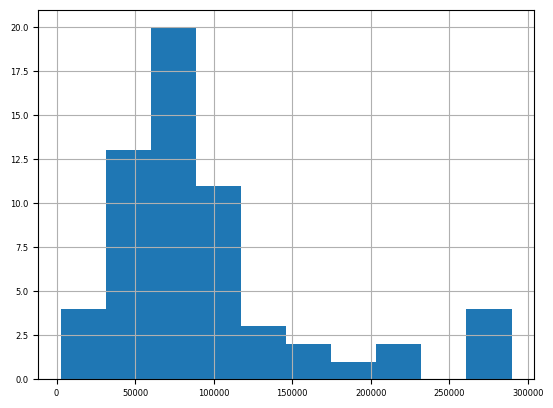

In [95]:
obd_df_day['load_ca'].hist()

<Axes: >

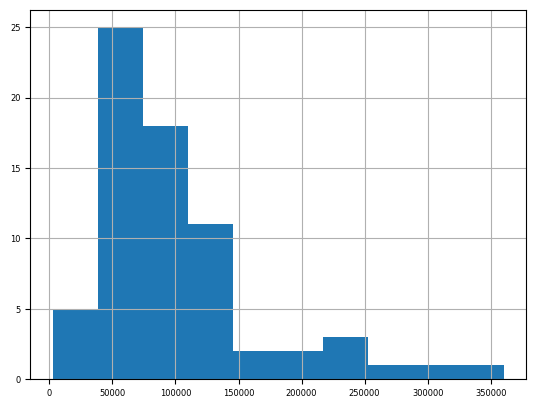

In [94]:
obd_df_mon['load_ca'].hist()

<Axes: >

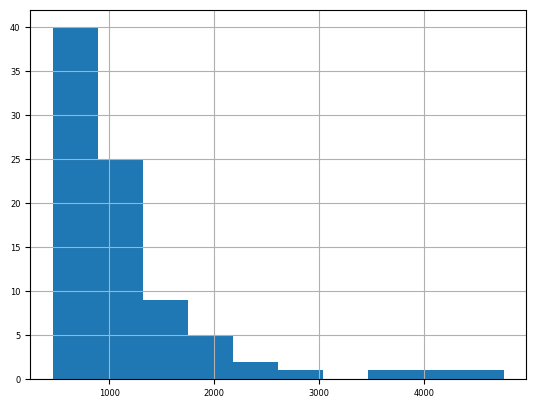

In [30]:
obd_df_mon['load_so4'].hist()

In [ ]:
['load_ca', 'load_mg', 'load_k', 'load_na', 'load_so4']

In [42]:
for i, sub_id in enumerate([9, 12, 75]):
    print(i, sub_id)

0 9
1 12
2 75


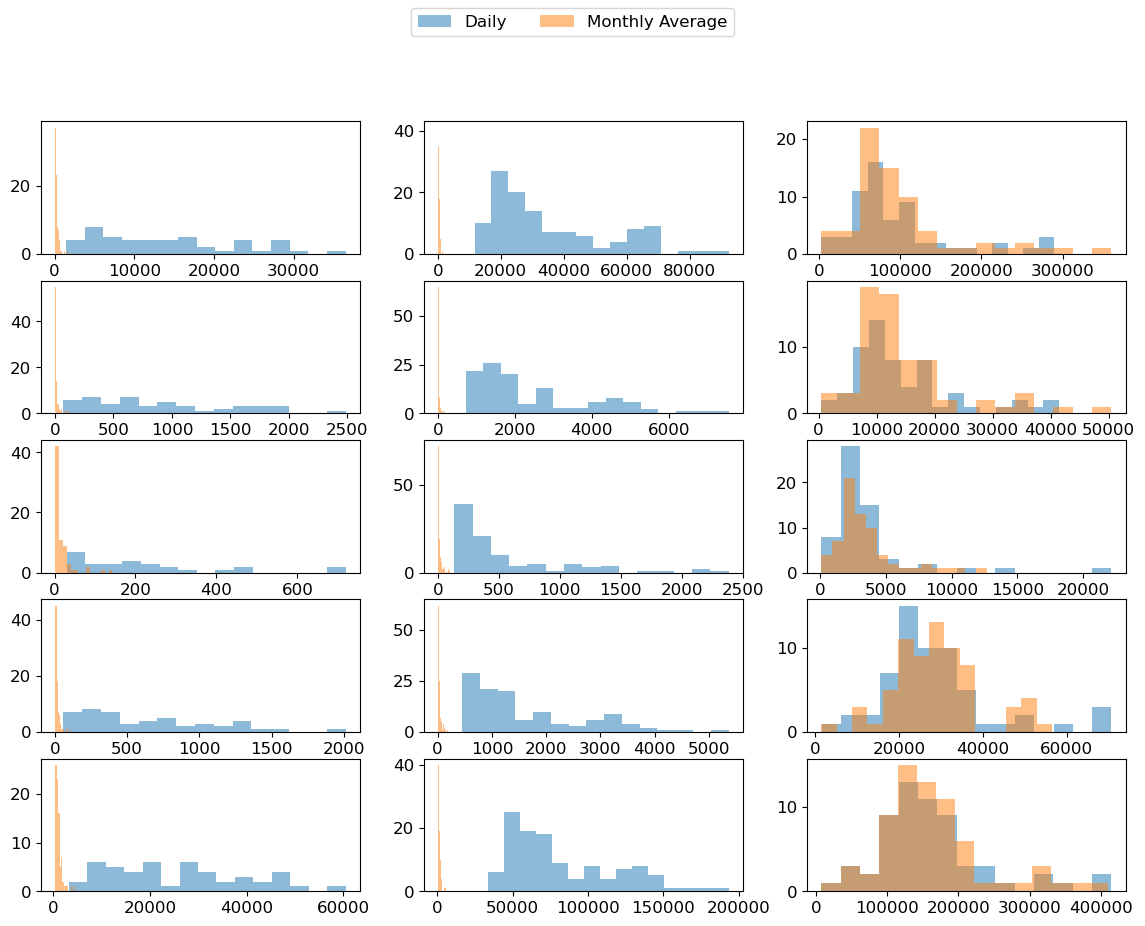

In [81]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 3, figsize=(14, 10))
for i, sub_id in enumerate([9, 12, 75]):
    obd_df = m1.read_salt_obd_cha(sub_id, time_step='day')
    obd_mdf = m1.read_salt_obd_cha(sub_id, time_step='mon')
    for j, obd_nam in enumerate(['load_ca', 'load_mg', 'load_k', 'load_na', 'load_so4']):
        axes[j, i].hist(obd_df[obd_nam], bins=15, alpha=0.5)
        axes[j, i].hist(obd_mdf[obd_nam], bins=15, alpha=0.5)
        axes[j, i].tick_params(axis='both', which='major', labelsize=12)
        
fig.legend(['Daily', 'Monthly Average'], ncols=2, loc='upper center', fontsize=12)
# fig.tight_layout()
plt.show()


load_mg


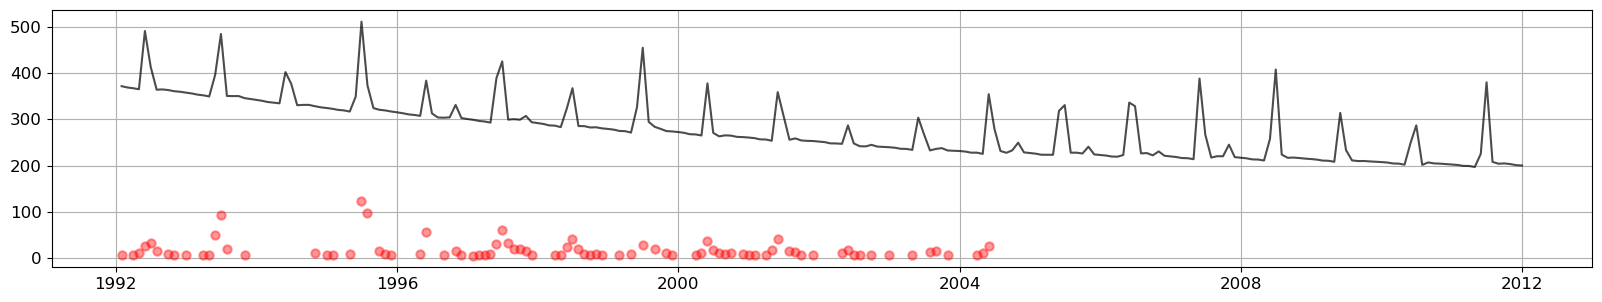

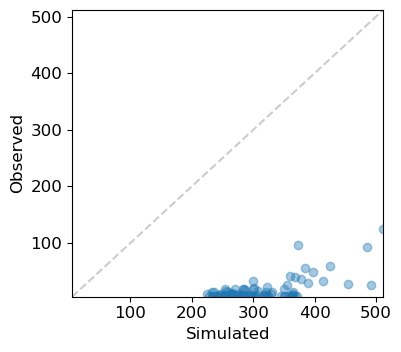

(-211.2633, 298.1966, -1746.0206, 0.4374)
load_k


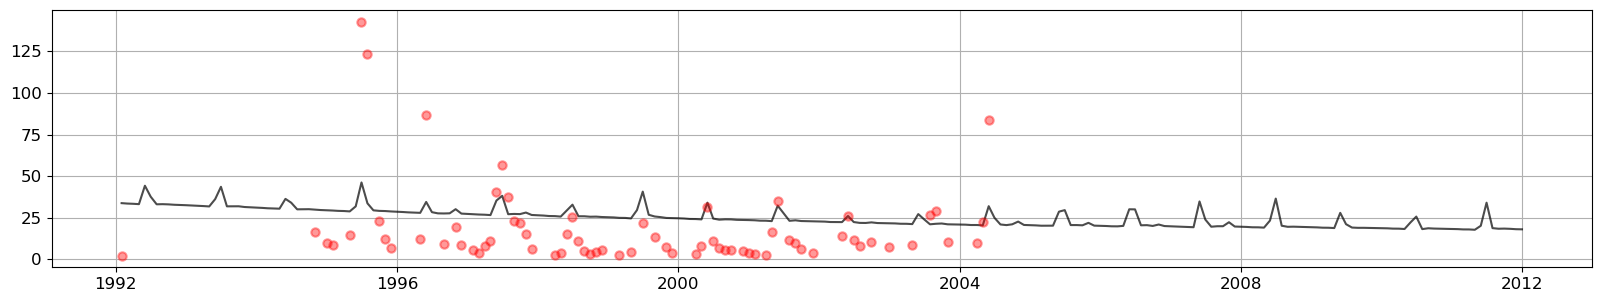

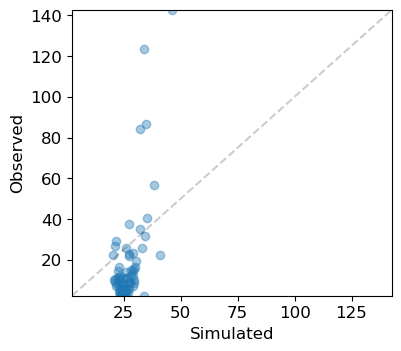

(0.0975, 23.8989, -47.0508, 0.4337)
load_na


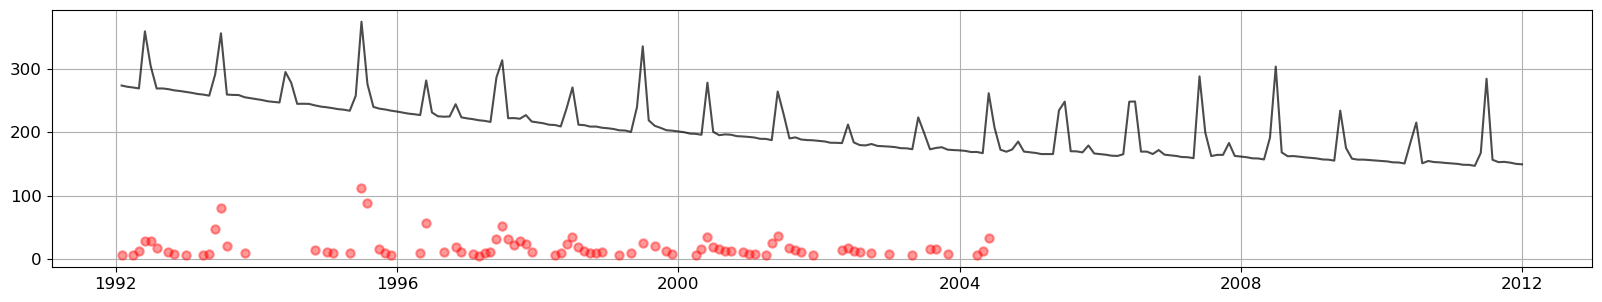

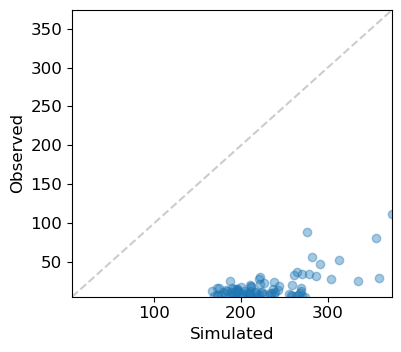

(-140.1434, 213.7599, -1145.0427, 0.4104)
load_so4


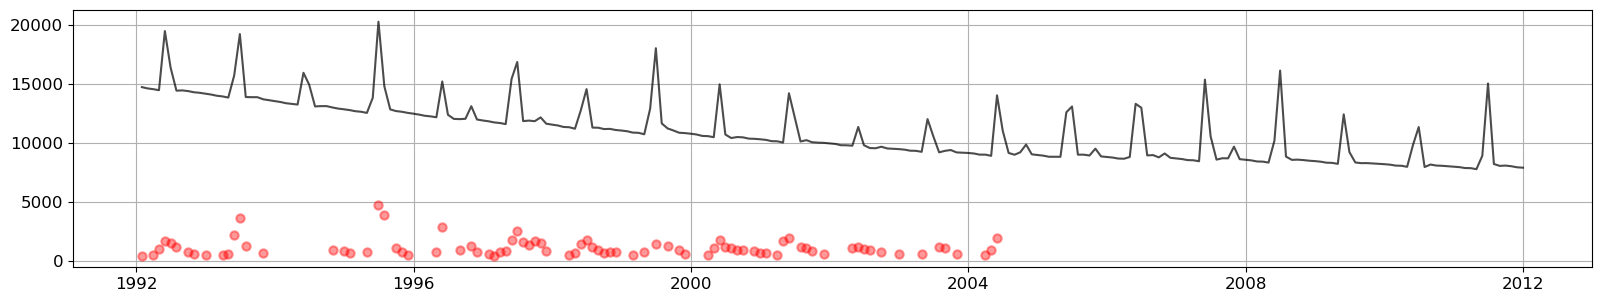

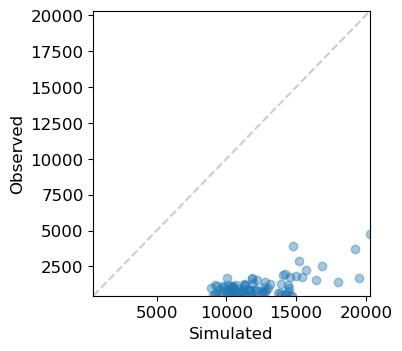

(-228.4486, 11346.5791, -978.6858, 0.3804)


In [80]:
for o in obd_df.columns[1:]:
    comdf = m1.sim_obd_df(sim_df, o, obd_df, o)
    print(o)
    SaltViz(comdf['1/1/1992':'12/31/2011']).hydro_sim_obd()
    SaltViz(comdf['1/1/1992':'12/31/2011']).reg_line()
    print(get_stats(comdf['1/1/1992':'12/31/2011']))